# Geometric Transformations

- **Greyscale Image**
- **Coloured Images** 

### Chroma Keying

The coloured screen is replaced by the background in movies. This is an example of colour image processing.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
import math

This image is: <class 'numpy.ndarray'>  with dimensions: (480, 852, 3)
[[[ 60 255 255]]]


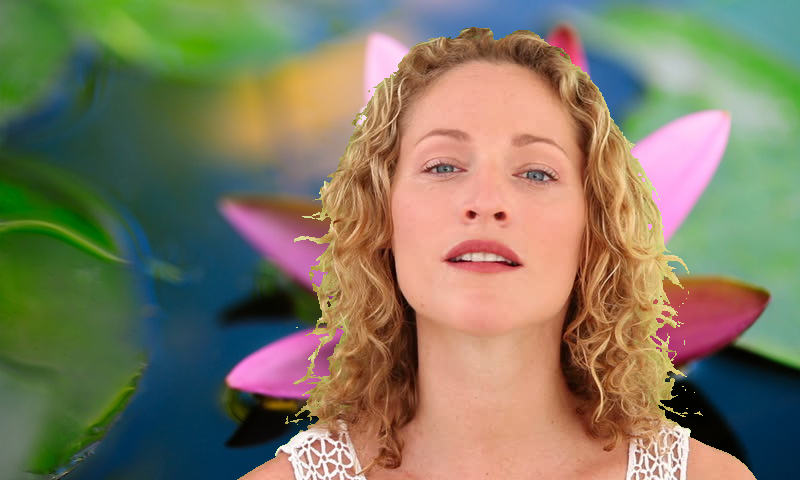

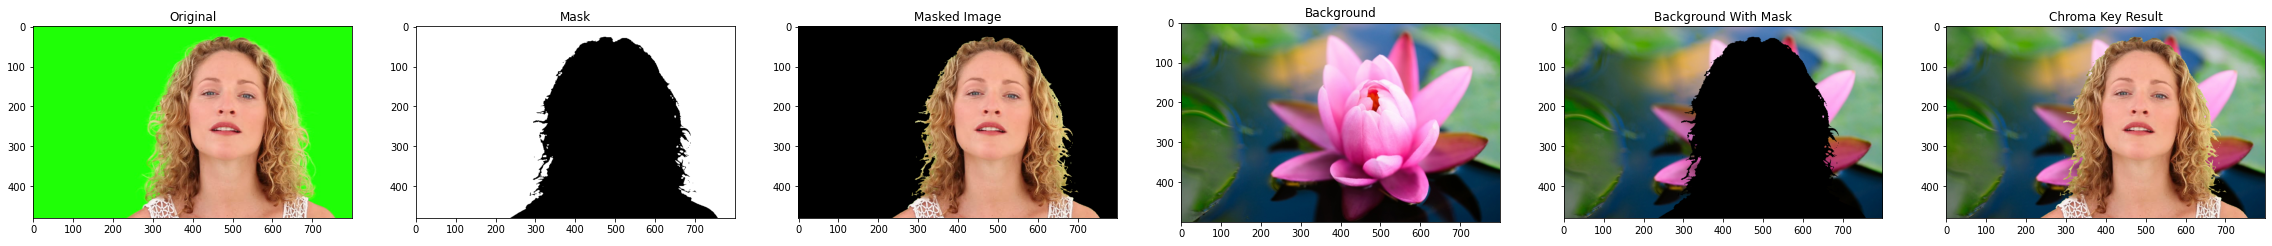

In [220]:
image = cv2.imread('/content/drive/My Drive/Images/chroma_img.jpg')
# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

# Crop image
image = image[:, 0:800]

# Make a copy of the image
copy = np.copy(image)

# Change colors
copyRGB = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
copyHSV = cv2.cvtColor(copy, cv2.COLOR_BGR2HSV)

fig = plt.figure(figsize=(40,10))
# Display the image copy
plt.subplot(161)
plt.imshow(copyRGB)
plt.title("Original")

green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print (hsv_green)

# Play around with these values until you isolate the green background

lower_green = np.array([30, 100, 100])    
upper_green = np.array([90, 255, 255])
# Define the masked area
mask = cv2.inRange(copyHSV, lower_green, upper_green)

# Vizualize the mask
plt.subplot(162)
plt.imshow(mask, 'gray')
plt.title("Mask")

# Mask the image to let the chroma image show through
masked_image = np.copy(copyRGB)
masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.subplot(163)
plt.imshow(masked_image)
plt.title("Masked Image")


# Load in a background image, and convert it to RGB 
back = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)
plt.subplot(164)
plt.imshow(back)
plt.title("Background")

# Crop it to the right size (514x816)
crop = back[0:480, :]

# Mask the cropped background so that the chroma image area is blocked
crop[mask == 0] = [0, 0, 0]

# Display the background
plt.subplot(165)
plt.imshow(crop)
plt.title("Background With Mask")

# Add the two images together to create a complete image!
final = crop + masked_image

# Display the result
plt.subplot(166)
plt.imshow(final)
plt.title("Chroma Key Result")

cv2_imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))

### Geometric Transformations

- Translation
- Rotation 
- Scaling
  - Uniform
  - Non-Uniform 

### Image Warping

Image filtering was changing the intesities, that is controlling the range of the function.

- $g$ is the suplied image
- $f$ is the resultant image

$$
g(x) = h(f(x))
$$

Changing the domain of the image, increasing the size of the image.

$$
g(x) = f(h(x))
$$

Two kinds:
- **Forward warping**
- **Backward warping**

When you mutiply with the inverse of the matrix to get original back.


### Parametric/ Global Warping


$$
p' = T(p)
$$ 

$$
p' = 
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
$$ 
and, 
$$
p = 
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$ 



Transformation $T$ is the a global coordinate changing machine. It is same for any point $p'$

Can be represented as matrix multiplication.

**Mirroring**

The 2D $T$ matrix for flipping the image along the $X$ axis would be,

$$
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$ 

The 2D $T$ matrix for flipping the image along the $Y$ axis would be,

$$
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}
$$

The 2D $T$ matrix for flipping the image along the line $y = x$ as axis would be,

$$
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

 
**Scaling**

The 2D $T$ matrix for scaling would be,

$$
\begin{bmatrix}
s & 0 \\
0 & s
\end{bmatrix}
$$ 

where $s$ is the scale factor.


Hence, the homogenous matrix is


$$
T = 
\begin{bmatrix}
s_x & 0 & 0\\0 & s_y & 0\\
0 & 0 & 1
\end{bmatrix}
= (x/w, y/w)
$$ 

**Rotation**

The 2D $T$ matrix for rotation would be,

$$
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
$$ 

The transpose gives the inverse use to rotate by $-\theta$

Hence, the homogenous matrix is

$$
T = 
\begin{bmatrix}
cos\theta & -sin\theta & 0\\
sin\theta & cos\theta & 0\\
0 & 0 & 1
\end{bmatrix}
= (x/w, y/w)
$$ 
**Rotation**

When you slant in $X$ and $Y$ directionsby different coordinates.

Shearing in X direction,
$$
\begin{bmatrix}
1 & a \\
0 & 1
\end{bmatrix}
$$ 

Shearing in Y direction,
$$
\begin{bmatrix}
1 & 0 \\
b & 1
\end{bmatrix}
$$ 

Hence, the homogenous matrix is

$$
T = 
\begin{bmatrix}
1 & sh_x & 0\\
sh_y & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
= (x/w, y/w)
$$ 

**Translation**

A linear transformation $T: V \rightarrow W$ is when,
$$
T(av_1​+bv_2​)=aT(v_1​)+bT(v_2​).
$$
Translation is not a linear operation 2D coordinates. Hence some modification need to made to the way we represent, $p, p', T$.

As long as it a 2D image in a fixed plane the z coordinate remains contstant and $w$ is a scaling factor

Conversion to **Homogeneous Coordinates**.

$$
p = (x, y)
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix}
$$ 

Conversion from **Homogeneous Coordinates**.

$w$ is the scaling factor.
$$
\begin{bmatrix}
x\\
y\\
w
\end{bmatrix}
= (x/w, y/w)
$$ 
Hence, the homogenous matrix is 

$$
T = 
\begin{bmatrix}
1 & 0 & t_x\\
0 & 1 & t_y\\
0 & 0 & 1
\end{bmatrix}
= (x/w, y/w)
$$ 


### Affine Transformations

Affine transformations are combinations of linear tranformations and translations and can be represented as matrices as well.

### **Properties**

- Origin can be moved around.
- Lines to map lines, lines remain intact.
- Parallel lines remain parallel.
- Ratios are preserved between lines, size and more.
- Closed under composition

$$
T = 
\begin{bmatrix}
a & b & c\\
d & e & f\\
0 & 0 & 1
\end{bmatrix}
$$ 

The degree of freedom is $6$ as there are $6$ variables.


### Translation

394 400
98.5 100.0
[[  1.    0.   98.5]
 [  0.    1.  100. ]]



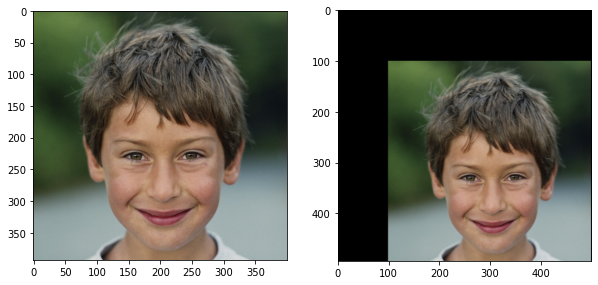

In [163]:
img = cv2.imread('/content/drive/My Drive/Images/boy_smiling.jpg')
imRgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = imRgb.shape
print(height, width)
print(height/4, width/4)
T = np.float32([[1, 0, height/4],
                [0, 1, width/4]])
print(T)
print()
# Window extended by 100 to show full image 
translated = cv2.warpAffine(imRgb, T, (width + 100, height + 100))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(imRgb)
ax2. imshow(translated)
plt.show()

### Rotation

Rotation of an image along any point can be done as well.

[[  0.70710678   0.70710678 -80.72139213]
 [ -0.70710678   0.70710678 199.12132034]]
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


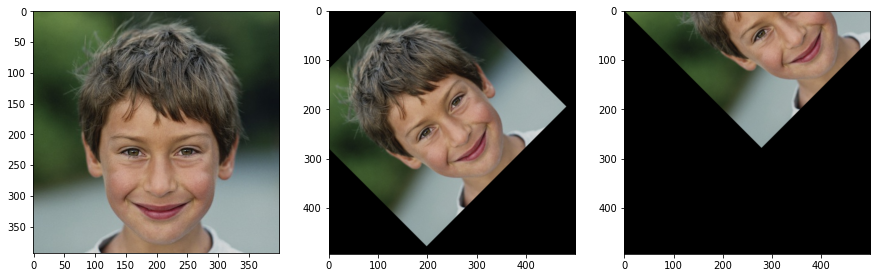

In [147]:
# Supply the point about which you want to rotate, the angle and third is scale
one = cv2.getRotationMatrix2D((width/2, height/2), 45,1)
two = cv2.getRotationMatrix2D((0, 0), 45,1)
rotateOne = cv2.warpAffine(imRgb, one, (width + 100, height + 100))
rotateTwo = cv2.warpAffine(imRgb, two, (width + 100, height + 100))

print(one)
print(two)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15,15])
ax1.imshow(imRgb)
ax2.imshow(rotateOne)
ax3.imshow(rotateTwo)
plt.show()

### Scaling

[[   2.    0. -200.]
 [  -0.    2. -197.]]


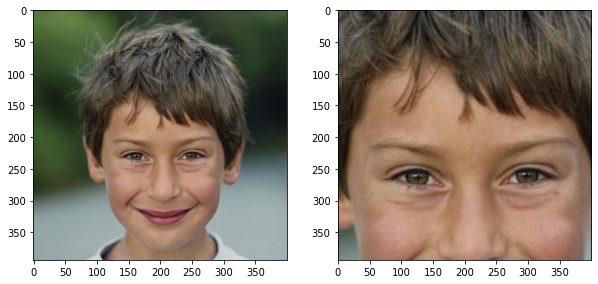

In [153]:
scale = cv2.getRotationMatrix2D((width/2, height/2), 0, 2)
scaleOne = cv2.warpAffine(imRgb, scale, (width, height))

print(scale)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(imRgb)
ax2.imshow(scaleOne)
plt.show()

### Affine Transformation


[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


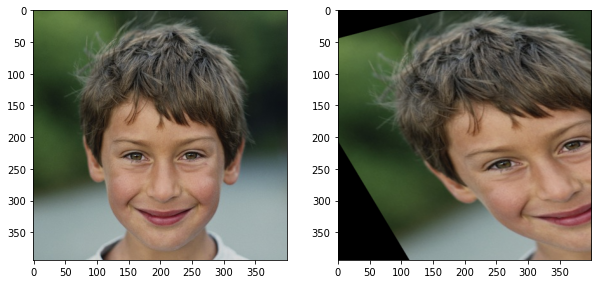

In [156]:
# Minimum number of points needed is three since 6 degree of freedom/ variable 
# Each point gives two eqautions 
pointsOne = np.float32([[50, 50], [200, 50], [50, 200]])
pointsTwo = np.float32([[10, 100], [200, 50], [100, 250]])

# Takes point array and gives T for affine
T = cv2.getAffineTransform(pointsOne, pointsTwo)
imageAffine = cv2.warpAffine(imRgb, T, (width, height))

print(T)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(imRgb)
ax2.imshow(imageAffine)
plt.show()

***Excercise!***

Align Ariana Grande's face, using affine transformations.

Text(0.5, 1.0, 'Translated And Scaled')

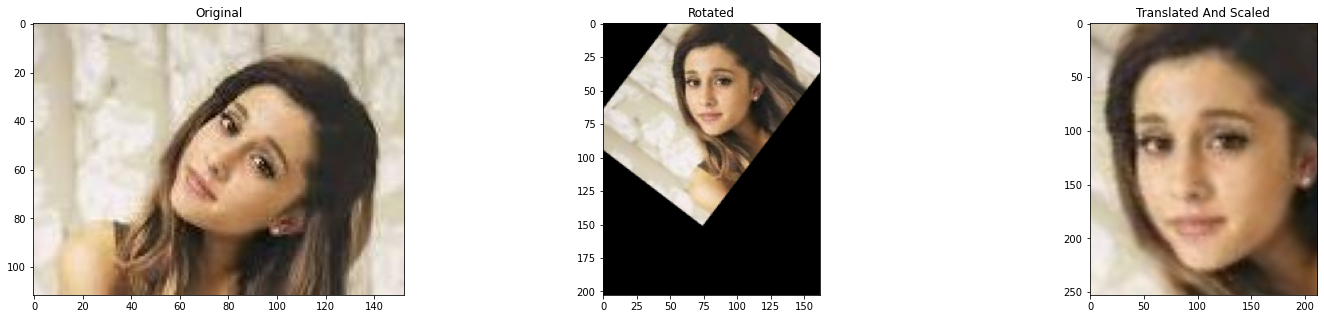

In [199]:
img = cv2.imread("/content/drive/My Drive/Images/tilted_face.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
width, height, channels = img.shape
eyeR = (60, 95)
eyeL = (47, 78)


line = np.sqrt((eyeR[0] - eyeL[0])**2 + (eyeR[1] - eyeL[1])**2)
horizontal = abs(eyeR[0] - eyeL[0])
angle = np.arccos(horizontal/line)

T = cv2.getRotationMatrix2D((height/2, width/2), math.degrees(angle), 1)
rotated = cv2.warpAffine(img, T, (width + 50, height + 50))

T = cv2.getRotationMatrix2D((70,10), 0, 3)
scaled = cv2.warpAffine(rotated, T, (width + 100, height + 100))

fig = plt.figure(figsize = (25,5))
plt.subplot(131)
plt.imshow(img)
plt.title("Original")
plt.subplot(132)
plt.imshow(rotated)
plt.title("Rotated")
plt.subplot(133)
plt.imshow(scaled)
plt.title("Translated And Scaled")

### Perspective/ Projective Transformations/ Homography

When the last row has variables as well in the affine transformation.

$$
H = 
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix}
$$

$i$ is just the scaling factor which is usually kept as 1. It scales the transformation matrix NOT the image.

Ratios no longer preseved, parrallel lines are lost. You can use this to transorm image to a shape while keeping it in a plane.

**Properties**
- Origin need not map to orgin
- Parrell lines are yeeted
- Ratios are yeeted
- Closed under composition


***Kink***

When you mutiply $T$ or $H$ sometimes you might not  get whole number values right? But pixels always need to be whole.

In this case the adjav=cent pixel values are calculated and the whole number between the two/more values is assigned.

**>** Read about this.

### Homography

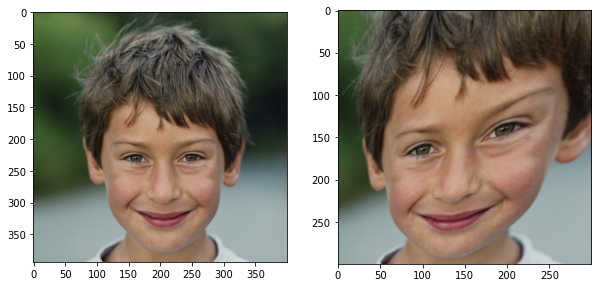

In [206]:
# There are 8 degrees of freedom and hence there is requirement of 4 points
pointsOne = np.float32([[50, 50], [300, 150], [25, 387], [389, 390]])
pointsTwo = np.float32([[0, 0], [300, 0], [0, 300], [350, 300]])

H = cv2.getPerspectiveTransform(pointsOne, pointsTwo)
homography = cv2.warpPerspective(imRgb, H, (300, 300))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(imRgb)
ax2.imshow(homography)
plt.show()

***Excercise!***

Put the Coca-Cola banner on the cricket ground using homography matrix.

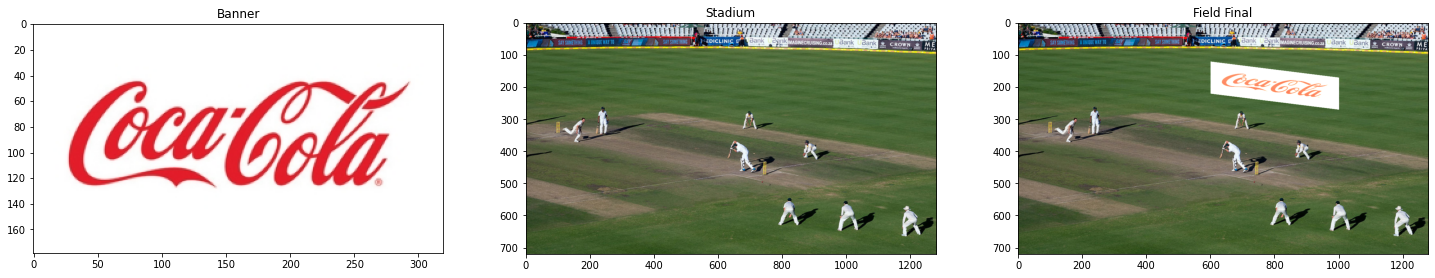

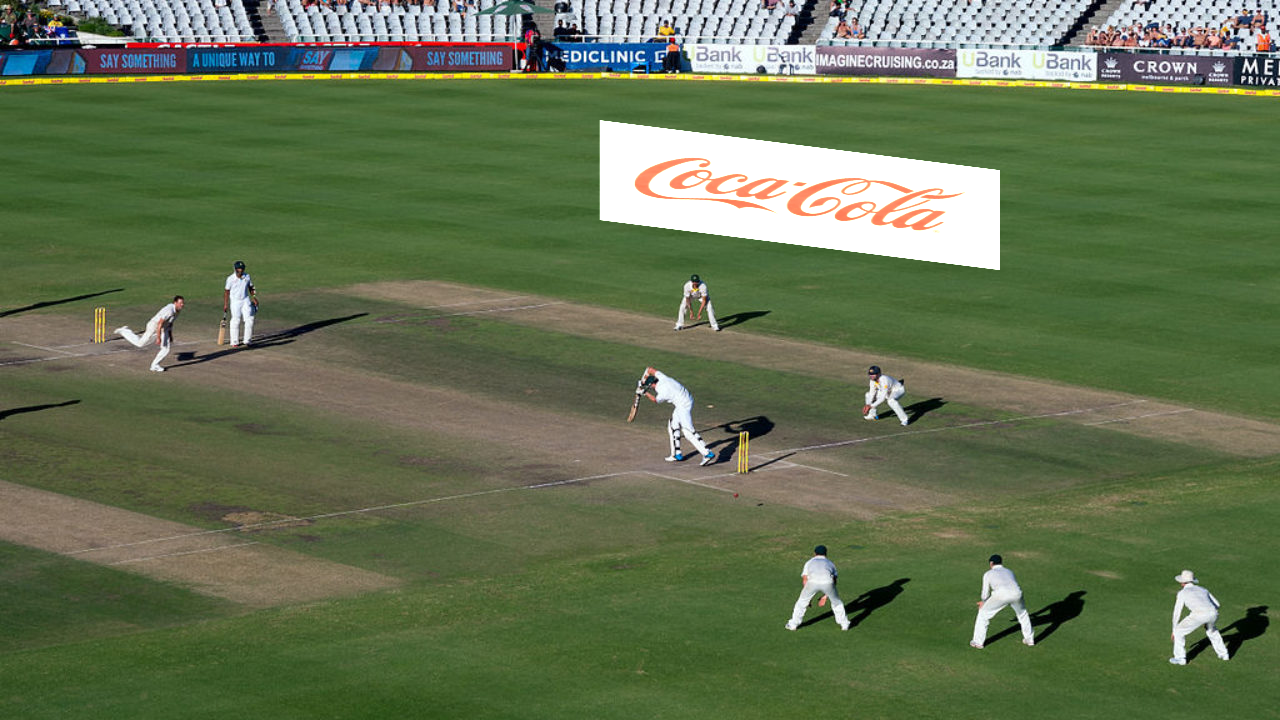

In [214]:
cricket = cv2.imread('/content/drive/My Drive/Images/stadium.jpg')
coke = cv2.imread('/content/drive/My Drive/Images/coca.jpg')

pointsOne = np.float32([[0,0],[0,179],[320, 0],[320,179]]) 
pointsTwo = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]])

height, width, columns = cricket.shape

H = cv2.getPerspectiveTransform(pointsOne, pointsTwo)
warpedCoke = cv2.warpPerspective(coke, H, (width, height))

result = cv2.add(cricket, warpedCoke)

fig = plt.figure(figsize = (25,5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(coke, cv2.COLOR_RGB2BGR))
plt.title("Banner")
plt.subplot(132)
plt.imshow(cv2.cvtColor(cricket, cv2.COLOR_RGB2BGR))
plt.title("Stadium")
plt.subplot(133)
plt.title("Field Final")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
plt.show()

cv2_imshow(result)